In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('./datasets/seaborn-data/titanic.csv')
display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [44]:
df.describe()   # 문자 없이 숫자만 통계내서 이상하게 나옴

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
print(df['survived'].value_counts())
print(df['pclass'].value_counts())
print(df['sex'].value_counts())
print(df['embarked'].value_counts())
print(df['who'].value_counts())
print(df['deck'].value_counts())

0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
male      577
female    314
Name: sex, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64
man      537
woman    271
child     83
Name: who, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64


In [46]:
# 전처리
## 데이터 조정
df['family_size'] = df['sibsp'] + df['parch']
display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [47]:
df1 = df.drop(['sibsp','parch','fare','class','adult_male','embark_town','alive'], axis=1)
display(df1.head())

,survived,pclass,sex,age,embarked,who,deck,alone,family_size
0,0,3,male,22.0,S,man,NaN,False,1
1,1,1,female,38.0,C,woman,C,False,1
2,1,3,female,26.0,S,woman,NaN,True,0
3,1,1,female,35.0,S,woman,C,False,1
4,0,3,male,35.0,S,man,NaN,True,0


In [48]:
# 결측치
display(df1.isnull().sum()/len(df1))

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
embarked       0.002245
who            0.000000
deck           0.772166
alone          0.000000
family_size    0.000000
dtype: float64

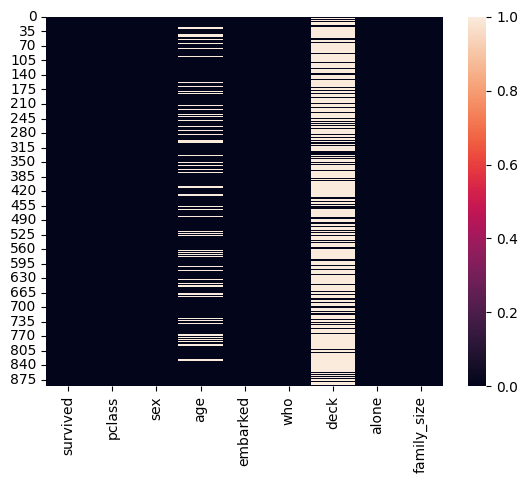

In [49]:
sns.heatmap(df1.isnull())
plt.show()

In [50]:
# deck 제거
df1.drop(['deck'], axis=1, inplace=True) # 원본은 놔두고 df1만 제거?

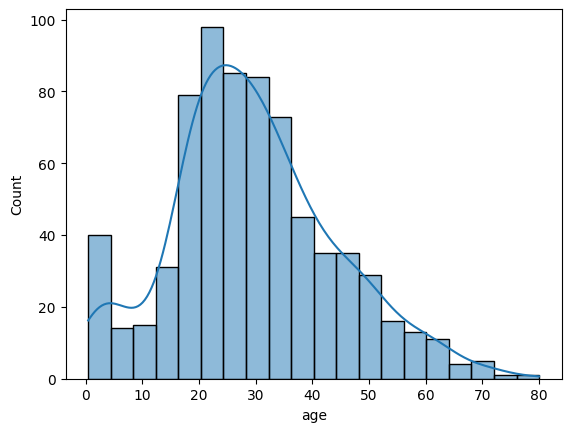

In [51]:
# age 처리
sns.histplot(df1['age'], kde=True) # kde로 추세선 그림
plt.show()

In [52]:
df.median(numeric_only = True)

survived        0.0000
pclass          3.0000
age            28.0000
sibsp           0.0000
parch           0.0000
fare           14.4542
adult_male      1.0000
alone           1.0000
family_size     0.0000
dtype: float64

In [53]:
df1['age'] = df1['age'].fillna(df1['age'].median())
display(df1.describe())

,survived,pclass,age,family_size
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.904602
std,0.486592,0.836071,13.019697,1.613459
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000
max,1.000000,3.000000,80.000000,10.000000


In [54]:
# embarked 범주형이기에 최빈값 선택
display(df1.mode())
df1['embarked'].mode()
df1['embarked'] = df1['embarked'].fillna(df1['embarked'].mode()[0])

,survived,pclass,sex,age,embarked,who,alone,family_size
0,0,3,male,28.0,S,man,True,0


In [55]:
df1.isnull().sum()/len(df1)

survived       0.0
pclass         0.0
sex            0.0
age            0.0
embarked       0.0
who            0.0
alone          0.0
family_size    0.0
dtype: float64

In [57]:
def plot_row(src, ref, col_list): # axis=1 방향으로 plot 하는 함수
    for index, value in enumerate(col_list): # enumerate: index, value 분류
        plt.subplot(1, len(col_list), index+1)
        sns.countplot(x=value, hue=ref, data=src)
        plt.title(value)
    
    plt.tight_layout()
    plt.show()

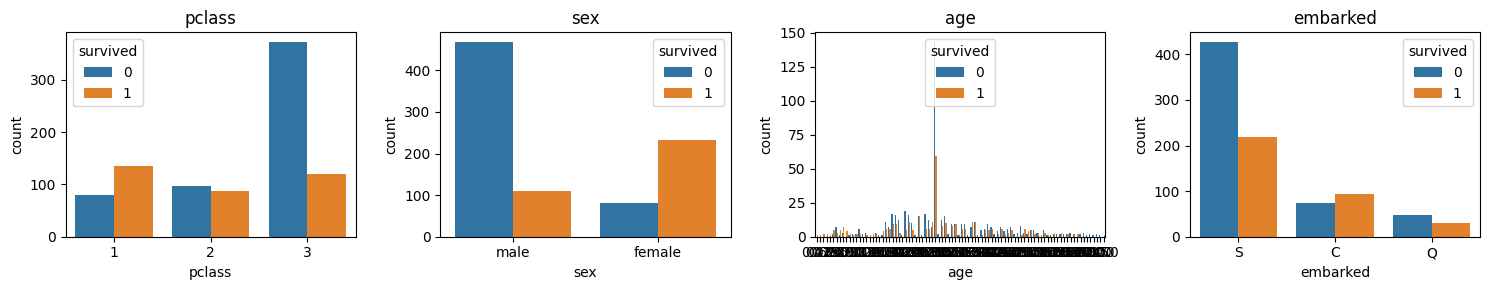

In [63]:
plt.figure(figsize=(15,3))
plot_row(df1, 'survived', ['pclass','sex','age','embarked'])

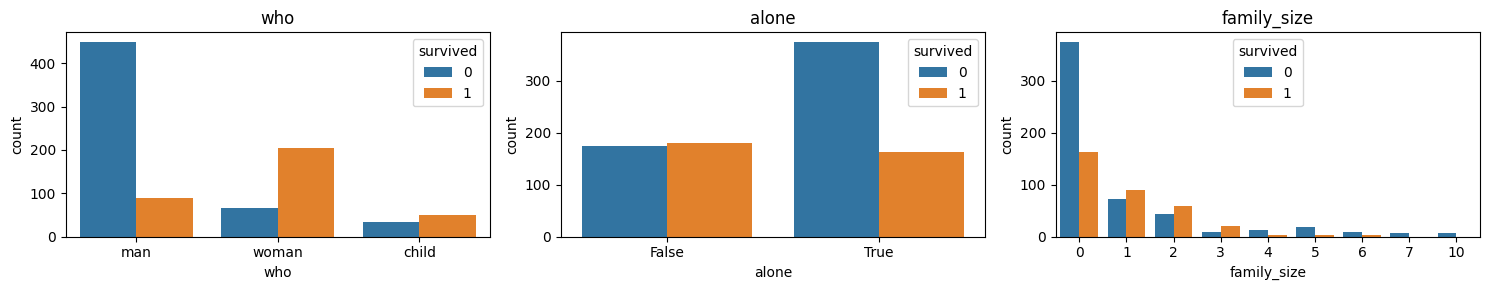

In [64]:
plt.figure(figsize=(15,3))
plot_row(df1, 'survived', ['who','alone','family_size'])

In [67]:
# 범주형 처리
labels, uniques = pd.factorize(df1['sex'])
df1['sex'] = labels
print(df1['sex'].value_counts())

labels, uniques = pd.factorize(df1['embarked'])
df1['embarked'] = labels
print(df1['embarked'].value_counts())

labels, uniques = pd.factorize(df1['who'])
df1['who'] = labels
print(df1['who'].value_counts())

labels, uniques = pd.factorize(df1['alone'])
df1['alone'] = labels
print(df1['alone'].value_counts())

0    577
1    314
Name: sex, dtype: int64
0    646
1    168
2     77
Name: embarked, dtype: int64
0    537
1    271
2     83
Name: who, dtype: int64
1    537
0    354
Name: alone, dtype: int64


In [68]:
# 타입변환
df1['age'] = df1['age'].astype(int)
df1.head()

,survived,pclass,sex,age,embarked,who,alone,family_size
0,0,3,0,22,0,0,0,1
1,1,1,1,38,1,1,0,1
2,1,3,1,26,0,1,1,0
3,1,1,1,35,0,1,0,1
4,0,3,0,35,0,0,1,0


In [76]:
df1.corr()
display(df1.corr()['survived'].sort_values())

pclass        -0.338481
alone         -0.203367
age           -0.064909
family_size    0.016639
embarked       0.106811
who            0.472637
sex            0.543351
survived       1.000000
Name: survived, dtype: float64

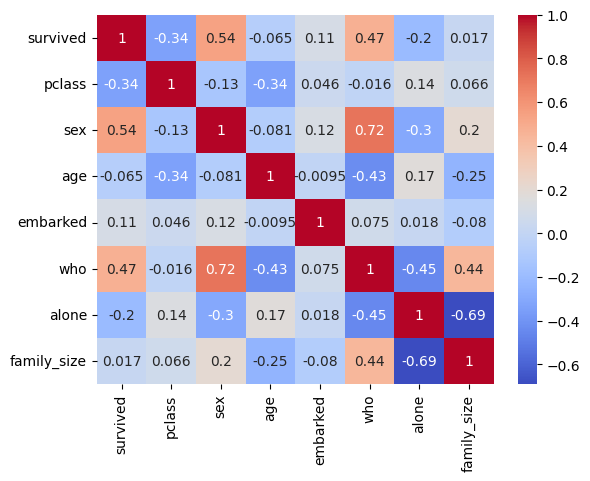

In [79]:
sns.heatmap(df1.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [80]:
# 학습
y_df = df1['survived']
x_df = df1.drop(['survived'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, random_state=15)

In [81]:
# 학습 (decision tree)
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=15) # 15번 테이블의 난수표를 쓰겠다

dt_clf.fit(X_train, y_train) # 학습 데이터, 학습 정답

DecisionTreeClassifier(random_state=15)

In [82]:
# 평가 
y_pred = dt_clf.predict(X_test)

# 평가
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7982062780269058